# Домашняя работа №7
# Студент: Правилов Михаил

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Есть задача Коши для дифура:
$y''(x) = a^2y(x), y(0) = 1, y'(0) = -a, x \in [0, T]$

1) Запишите уравнение в виде системы уравнений первого порядка

Пусть $y'(x) = y_1(x)$. 

Тогда получаем систему: $y_1(x) = y'(x)$ and $y_1'(x) = a^2 * y(x)$

$y_1(0) = -a, y(0) = 1$

2) Напишите программу решения полученной системы методом Эйлера с постоянным шагом $h = T / N$, N - количество интервалов. Постройте решение для нескольких значений $N = 10, 50, 100$ со значениями $T = 10, a \in \{1, \sqrt{20}\}$

Решать будем так: 

$y_{i + 1} = y_i + h * y_{1_{i}}$

$y_{1_{i + 1}} = y_{1_{i}} + h * a^2 * y_{i}$

In [21]:
T = [10]
a = [1, np.sqrt(20)]
N = [10, 50, 100]
def get_lode_2nd_order(a):
    return [lambda x, y, y1: y1, lambda x, y, y1: a ** 2 * y]
lodes = [[get_lode_2nd_order(a_item), 1, -a_item] for a_item in a]

In [22]:
def solve_euler_ode_2nd_order(f0, f1, y0, y1, N, T):
    ys0 = [y0]
    ys1 = [y1]
    h = T / N
    x = 0
    for i in range(N):
        y0_new = ys0[-1] + h * f0(x, ys0[-1], ys1[-1])
        y1_new = ys1[-1] + h * f1(x, ys0[-1], ys1[-1])
        ys0.append(y0_new)
        ys1.append(y1_new)
        x = x + h
    return ys0

In [31]:
def draw_solution(solver, equation_2nd_order, T, N):
    h = T / N
    data_x = [i * h for i in range(N + 1)]
    data_y = solver(equation_2nd_order[0][0], equation_2nd_order[0][1], 
                    equation_2nd_order[1], equation_2nd_order[2], N, T)
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("y")
    plt.xlabel("x")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


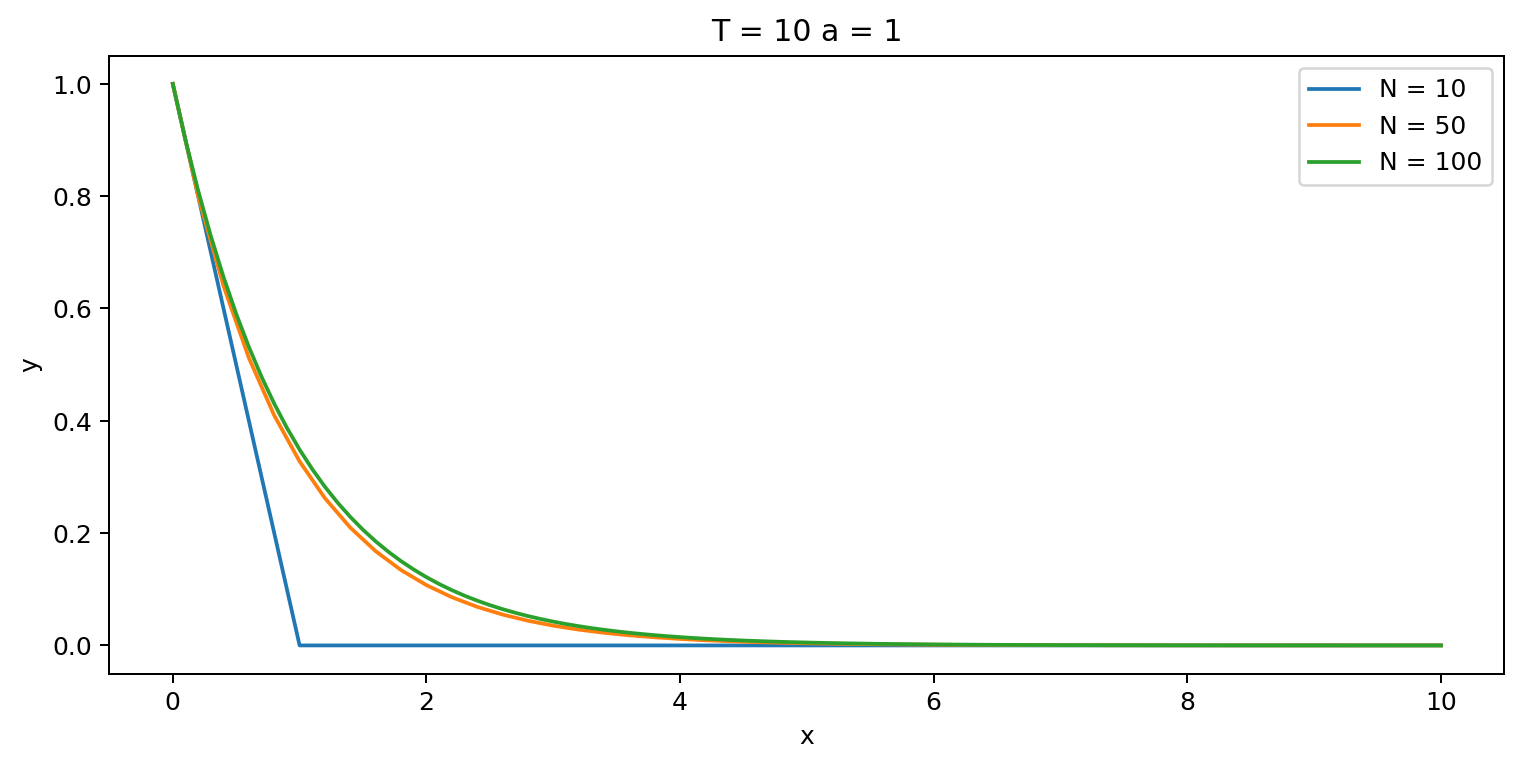

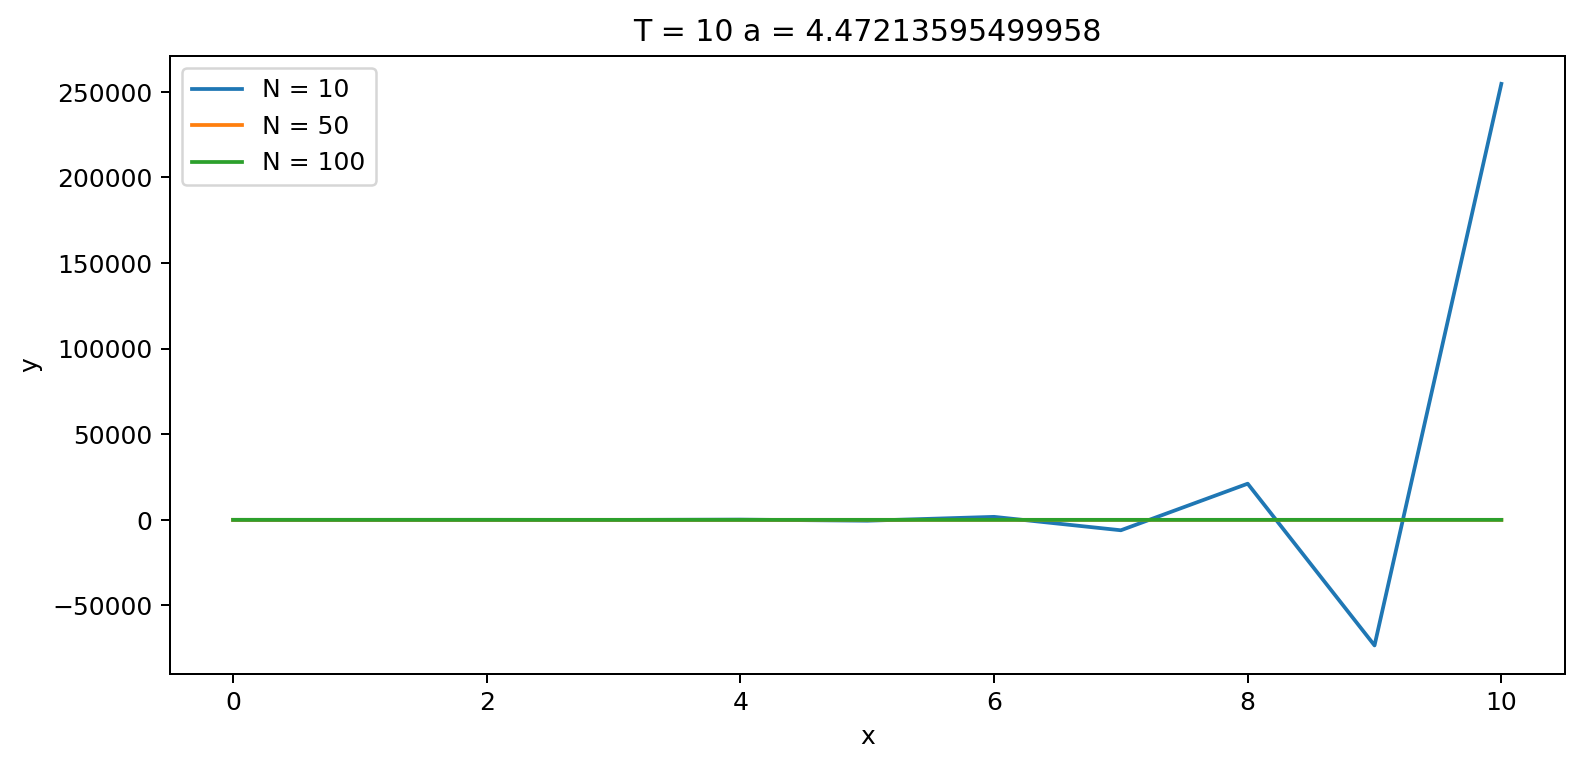

In [32]:
for T_item in T:
    for a_i in range(len(a)):
        plt.figure(figsize=(10, 10), dpi=180)
        for N_item in N:
            draw_solution(solve_euler_ode_2nd_order, lodes[a_i], T_item, N_item)
        plt.title("T = " + str(T_item) + " a = " + str(a[a_i]))
        legend = tuple("N = " + str(N_item) for N_item in N)
        plt.legend(legend)
        plt.show()

Как видим, учитывая, что решение убывающая экспонента, то первый график это отражает неплохо. Единственное N=10 все же маловато, поэтому точность падает. На втором графике, N=10 улетает в небеса. Впрочем это будет видно и на графике ошибок.

3) Постройте зависимость погрешности решения $\epsilon = max_i|y(x_i) - u(x_i)|$, где $u(x)$ - точное решение, от числа интервалов $N <= 200$, для тех же T и a.

Для каких N точность достигается лучше, чем $10^{-3}$? Объясните полученные результаты.

Если решить квадратное уравнение, а потом подставить начальные условия, то получим очень красивое решение этого уравнения:

$y(x) = e^{-ax}$

In [62]:
def real_solution(a):
    return lambda x: np.e ** (-a * x)

In [70]:
def get_max_error(solver, real, equation_2nd_order, N, T):
    solved = solver(equation_2nd_order[0][0], equation_2nd_order[0][1], 
                    equation_2nd_order[1], equation_2nd_order[2], N, T)
    h = T / N
    real_solutions = [real(i * h) for i in range(N + 1)]
    return max([abs(solved[i] - real_solutions[i]) for i in range(len(real_solutions))])

def draw_error(solver, real, equation_2nd_order, T, N_min=1, N_max=200):
    data_x = [N for N in range(N_min, N_max + 1)]
    data_y = [np.log10(get_max_error(solver, real, equation_2nd_order, N, T)) for N in data_x]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("log(error)")
    plt.xlabel("N")
    
def draw_line(y, N_min=1, N_max=200):
    data_x = [N_min, N_max]
    data_y = [y, y]
    plt.subplot(211)
    plt.plot(data_x, data_y)

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


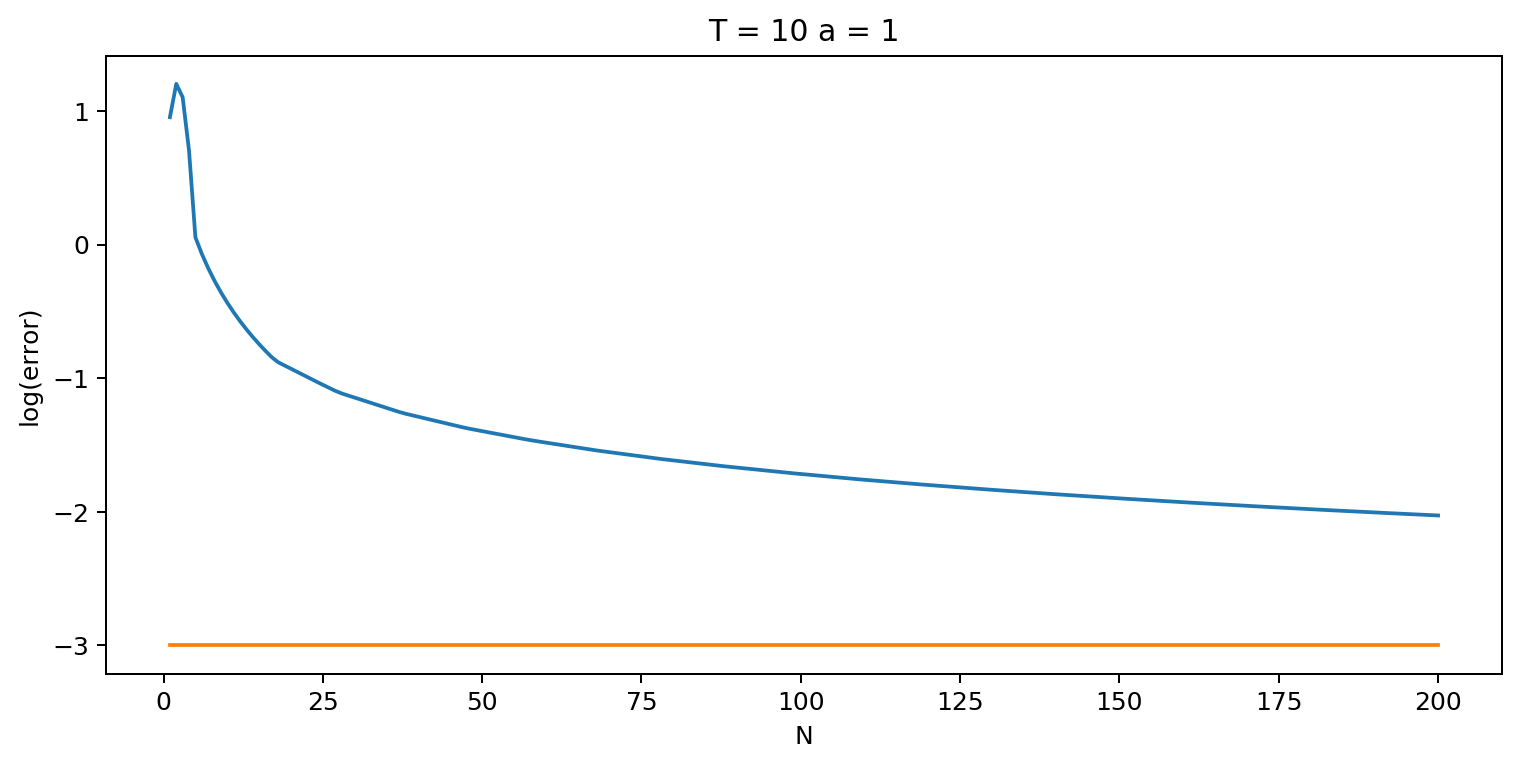

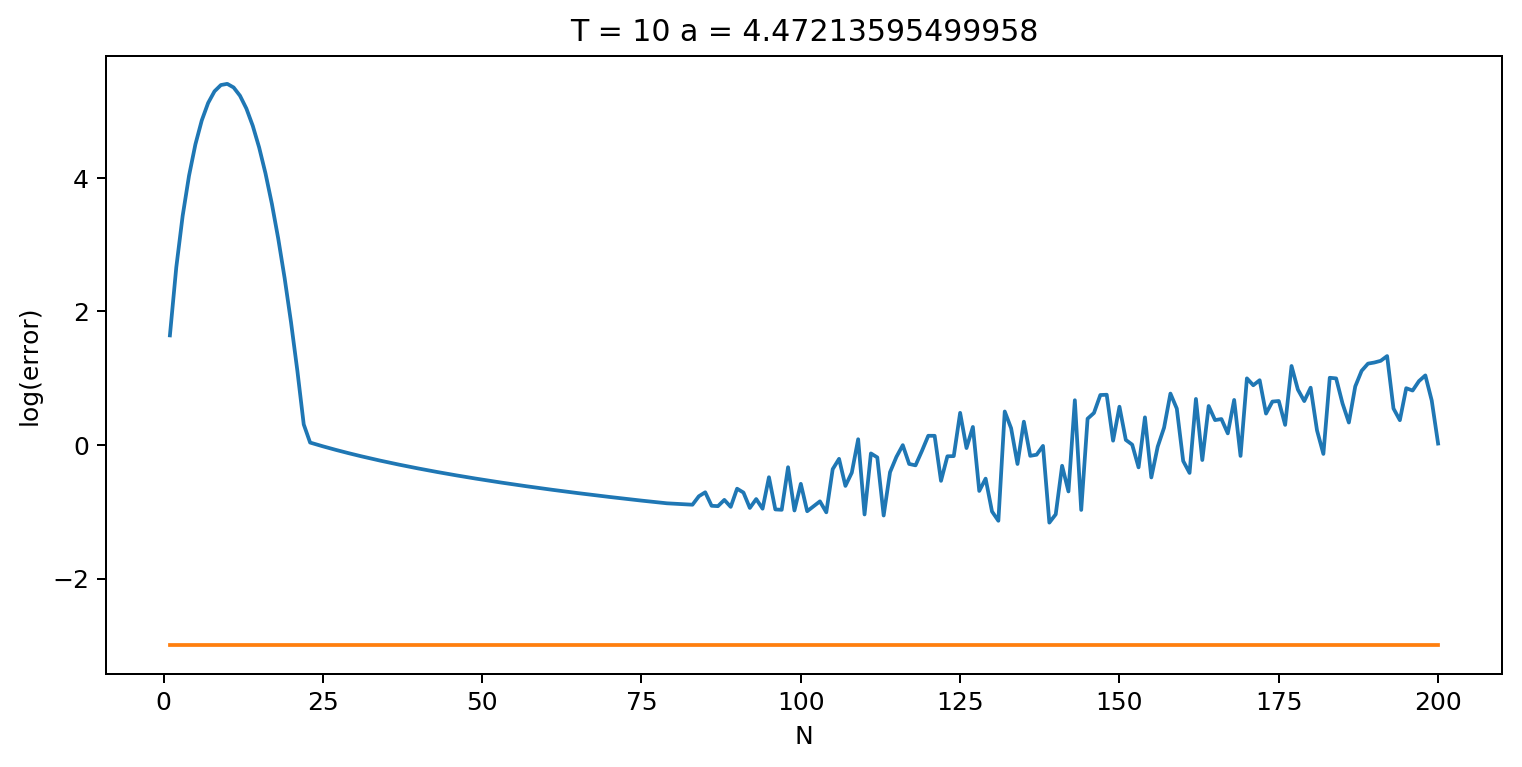

In [72]:
for T_item in T:
    for a_i in range(len(a)):
        plt.figure(figsize=(10, 10), dpi=180)
        draw_error(solve_euler_ode_2nd_order, real_solution(a[a_i]), lodes[a_i], T_item)
        draw_line(-3)
        plt.title("T = " + str(T_item) + " a = " + str(a[a_i]))
        plt.show()

Как раз мы тут видим на втором графике, что макисмальная ошибка для N=10 очень высока. Это согласуется с графиком выше, где значение функции для N=10 улетело в небеса. 

В целом видное отличие, что большие N при $а=\sqrt{20}$ не помогают, а вот при $a=1$ ошибка монотонно убывает. Но не один из методов не пробил отметку $10^{-3}$ (оранжевая прямая)

4) Повторите задание 3) для метода Рунге-Кутта 2-го порядка и N <= 500. Сравните результаты с методом Эйлера

In [99]:
def solve_runge_ode_2nd_order(f0, f1, y0, y1, N, T, beta=1/2):
    ys0 = [y0]
    ys1 = [y1]
    h = T / N
    x = 0
    for i in range(N):
        y0_new = ys0[-1] + h * ( (1 - beta) * f0(x, ys0[-1], ys1[-1]) +
                                beta * f0(x + h / (2 * beta), 
                                         ys0[-1] + h / (2 * beta) * f0(x, ys0[-1], ys1[-1]),
                                         ys1[-1] + h / (2 * beta) * f1(x, ys0[-1], ys1[-1])) )
        y1_new = ys1[-1] + h * ( (1 - beta) * f1(x, ys0[-1], ys1[-1]) +
                                beta * f1(x + h / (2 * beta), 
                                         ys0[-1] + h / (2 * beta) * f0(x, ys0[-1], ys1[-1]),
                                         ys1[-1] + h / (2 * beta) * f1(x, ys0[-1], ys1[-1])) )
        ys0.append(y0_new)
        ys1.append(y1_new)
        x = x + h
    return ys0

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


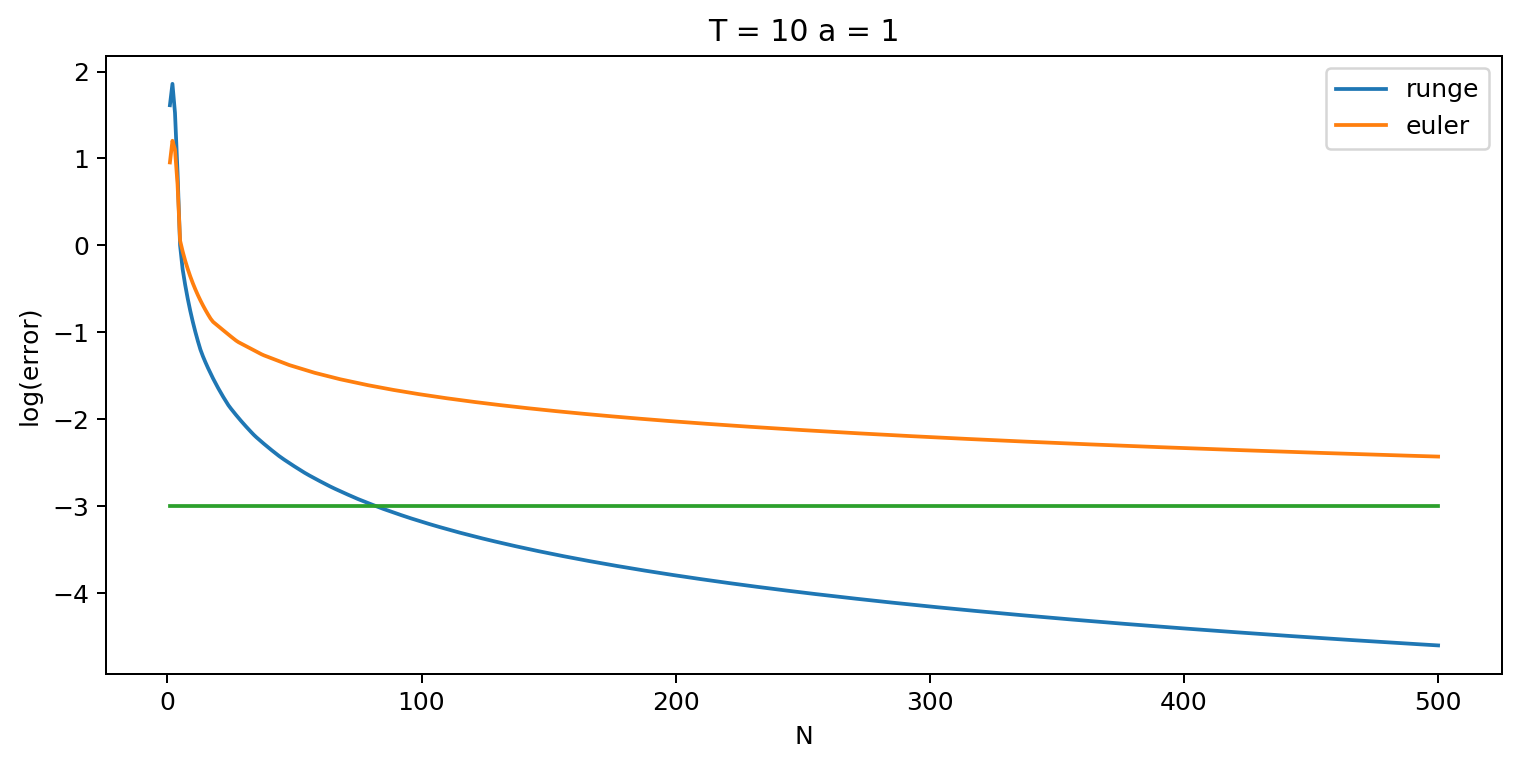

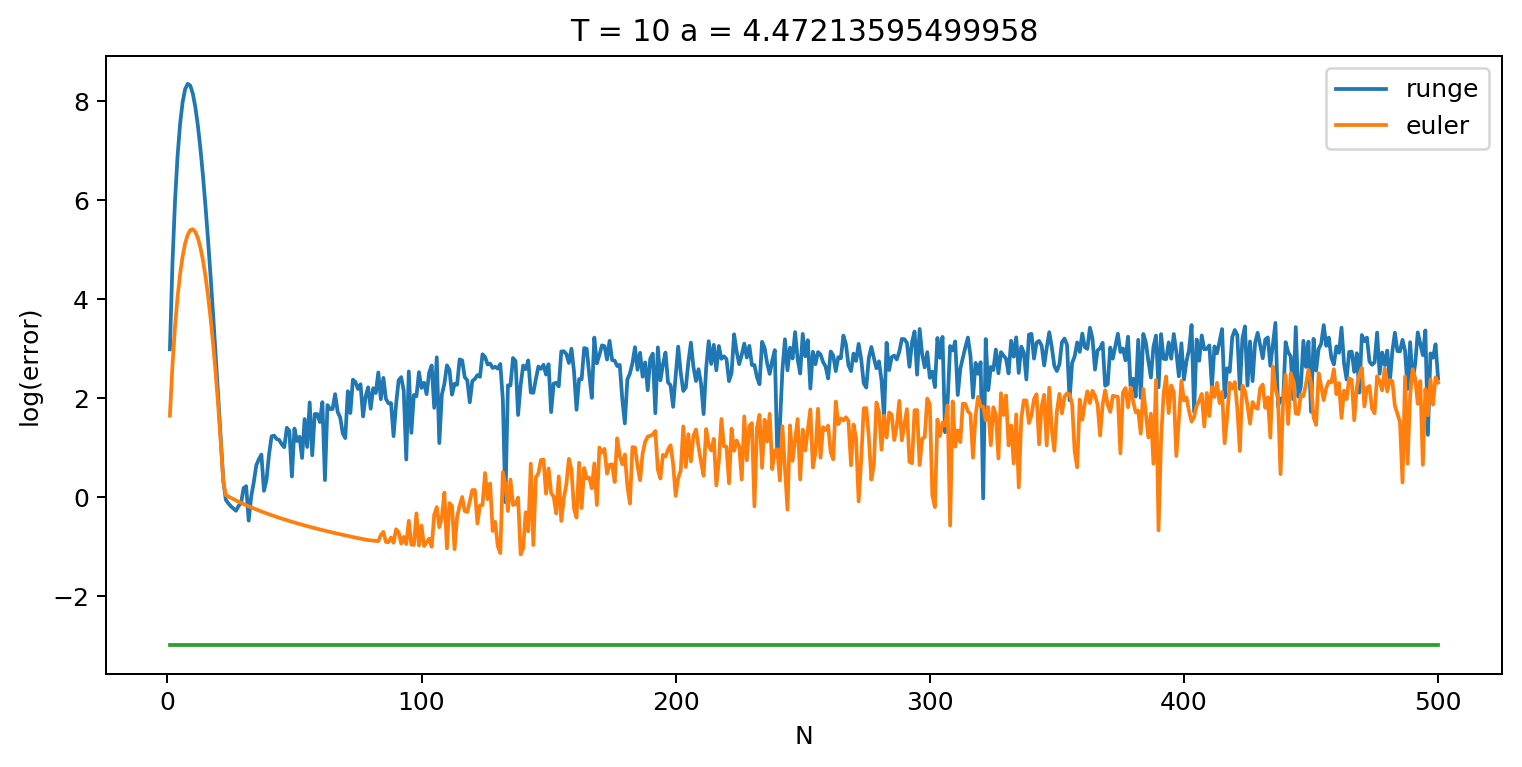

In [100]:
for T_item in T:
    for a_i in range(len(a)):
        plt.figure(figsize=(10, 10), dpi=180)
        draw_error(solve_runge_ode_2nd_order, real_solution(a[a_i]), lodes[a_i], T_item, 1, 500)
        draw_error(solve_euler_ode_2nd_order, real_solution(a[a_i]), lodes[a_i], T_item, 1, 500)
        draw_line(-3, 1, 500)
        plt.legend(("runge", "euler"))
        plt.title("T = " + str(T_item) + " a = " + str(a[a_i]))
        plt.show()

Зеленая прямая это наш барьер в $10^{-3}$. 

Как видим рунге для a=1 уверенно пробил его и оба метода при а=1 убывают довольно быстро. Убывает быстрее, чем степенная от $h$, что согласуется с лекцией. 

Но при $a=\sqrt{20}$ рунге хуже, хотя говорить об этом особо не имеет смысла, потому что функции слишком не монотонны и в целом можно посоветовать при $a=\sqrt{20}$ не брать N больше чем 75. Рунге на втором графике хуже, скорее всего потому что больше ошибок в вычислениях накапливается, так как вычислений больше по сравнению с Эйлером.